## Roll No: 31440
### DSBDAL Assignment - 4


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("BostonHousing.csv")

**Dataset:** https://github.com/selva86/datasets/blob/master/BostonHousing.csv
- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per house
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000 dollars
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in 1000s dollars

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data=df
data.rename(columns = {'medv':'Price'},inplace=True)

In [5]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
data.shape

(506, 14)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [9]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
Price      float64
dtype: object

In [10]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
Price      0
dtype: int64

## Visualizations

<AxesSubplot:>

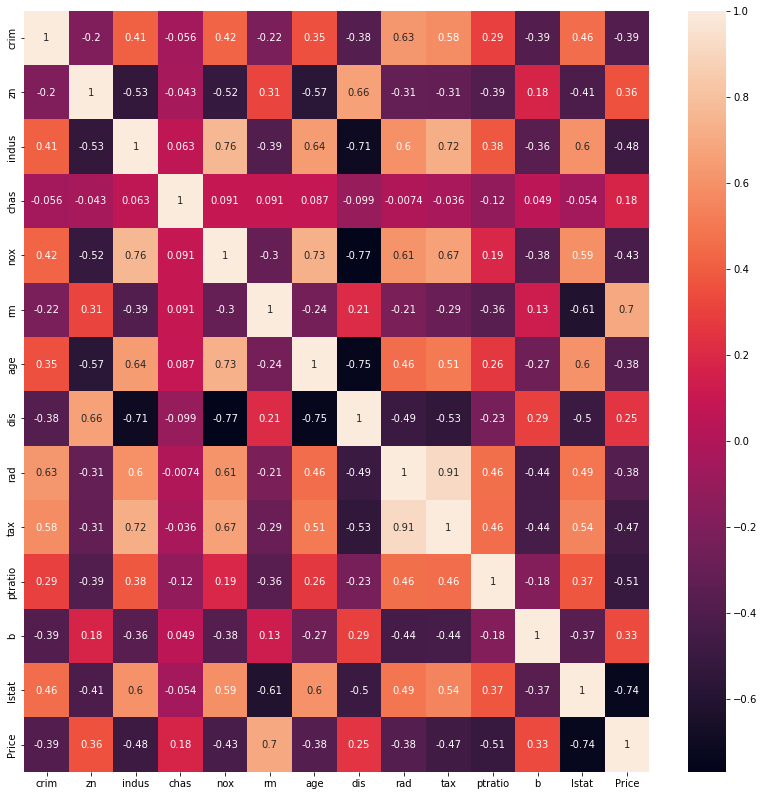

In [11]:
# Plotting a heatmap for the correlation matrix
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)
sns.heatmap(data.corr(),annot=True)

**Observations:**
- As **medv** is the target variable we llok for correlation of other variables with medv
- We can see that **medv** has a high positive correlation with **rm** and a high negative correlation with **lstat**
- We choose **lstat**,**indus** and **ptratio** from negative correlation, **rm** ,**zn**,**dis**

In [12]:
cols=['lstat','indus','ptratio','rm','zn','dis','Price'];

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[cols])
data[cols] = scaler.transform(df[cols])

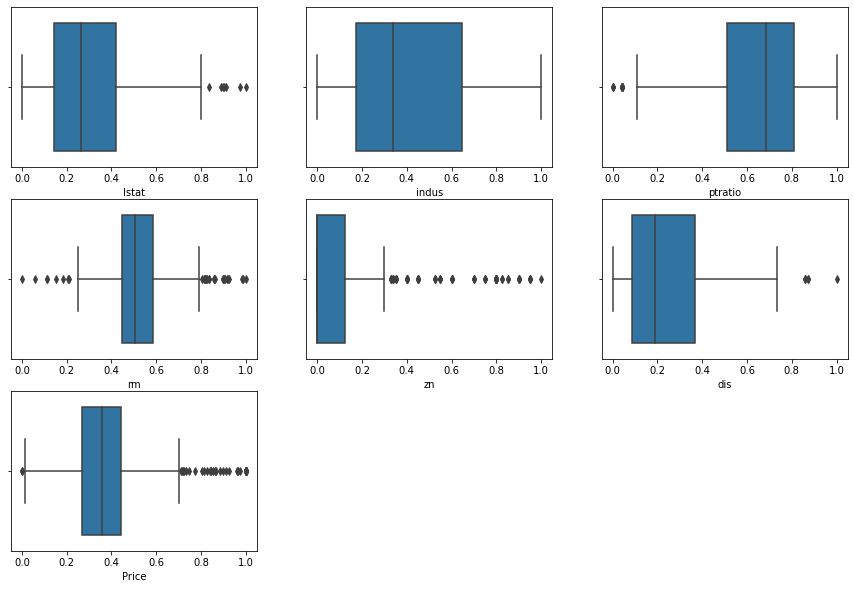

In [14]:
def boxplot():
    #plt.subplot(total rows,total columns,plot number)
    plt.figure(figsize=(15,10))
    t=1
    for i in cols:
        plt.subplot(3,3,t)
        t+=1
        sns.boxplot(data[i])
boxplot()

In [15]:
#removing of outliers
for i in cols:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    
    Lower_limit=Q1-1.5*IQR
    Upper_limit=Q3+1.5*IQR
    
    data=data[(data[i]>Lower_limit)&(data[i]<Upper_limit)]

In [16]:
features=data[cols[0:6]]
prices=data['Price']

In [17]:
features

,lstat,indus,ptratio,rm,zn,dis
0,0.089680,0.067815,0.287234,0.577505,0.18,0.269203
1,0.204470,0.242302,0.553191,0.547998,0.00,0.348962
2,0.063466,0.242302,0.553191,0.694386,0.00,0.348962
3,0.033389,0.063050,0.648936,0.658555,0.00,0.448545
5,0.096026,0.063050,0.648936,0.549722,0.00,0.448545
...,...,...,...,...,...,...
501,0.219095,0.420455,0.893617,0.580954,0.00,0.122671
502,0.202815,0.420455,0.893617,0.490324,0.00,0.105293
503,0.107892,0.420455,0.893617,0.654340,0.00,0.094381
504,0.131071,0.420455,0.893617,0.619467,0.00,0.114514


In [18]:
prices

0      0.422222
1      0.368889
2      0.660000
3      0.631111
5      0.526667
         ...   
501    0.386667
502    0.346667
503    0.420000
504    0.377778
505    0.153333
Name: Price, Length: 384, dtype: float64

### Splitting the training and testing data

In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size =0.3,random_state=0)

print("X_train shape : ", X_train.shape)
print("X_test shape  : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape  : ", y_test.shape)

X_train shape :  (268, 6)
X_test shape  :  (116, 6)
y_train shape :  (268,)
y_test shape  :  (116,)


### Building Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)  
y_pred = reg.predict(X_test)

In [22]:
for i in y_pred:
    print(i)

0.41134181302635403
0.22642036044311573
0.5448571446865068
0.34932614471253454
0.3542301471076487
0.28989817353913905
0.19278274523224054
0.44727903900933447
0.24861436308380389
0.1382052123732581
0.36002208793954427
0.33168542270749557
0.2993119833028387
0.435517258095776
0.3582370136947294
0.3407750831660142
0.3254003906983882
0.10059435067149053
0.4324681606193953
0.24966899121910874
0.2681660548654158
0.2988436689177393
0.12424084824114229
0.46147581922485953
0.4004635244515562
0.4738206418779315
0.3144124661267942
0.36536528851597905
0.21215723624210225
0.12069579550472381
0.1847713569991256
0.4375824534434202
0.37640111209113164
0.3316268945038898
0.43390543813909327
0.2642245645434387
0.12595778205428726
0.2741644810649083
0.3739781197477503
0.42969177228814714
0.2706453567563284
0.3937758916059988
0.39078510815158624
0.2630015977326125
0.09561730707943927
0.42753563443372994
0.377931139385771
0.45829855099235434
0.4285478354509923
0.38069836450745764
0.2910366658590255
0.425658

In [23]:
y_test

294    0.371111
136    0.275556
237    0.588889
59     0.324444
346    0.271111
         ...   
147    0.213333
216    0.406667
76     0.333333
311    0.380000
13     0.342222
Name: Price, Length: 116, dtype: float64

In [24]:
print("Training Accuracy :",reg.score(X_train,y_train))

Training Accuracy : 0.6697838363430575


In [25]:
print("Testing Accuracy :",reg.score(X_test,y_test))

Testing Accuracy : 0.6507117347605373


<h4>Coefficient of determination/R2 score for evaluate the performance of a linear regression model</h4>

In [26]:
#r2 =1-sum of residual error/total sum of errors
#residual error =difference between group of observed values and arithmetical mean
from sklearn.metrics import mean_squared_error,r2_score
print("Model_accuracy :",r2_score(y_test, y_pred))
mse=mean_squared_error(y_pred, y_test)
print("Mean Squared Error :",mse)


Model_accuracy : 0.6507117347605373
Mean Squared Error : 0.00513518817474211


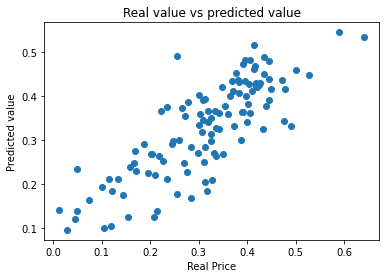

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel("Real Price")
plt.ylabel("Predicted value")
plt.title("Real value vs predicted value")
plt.show()